In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu

In [ ]:
df=pd.read_csv("Data_GiaoDich_ShopCayCanh - DoanhThu.csv")
df.head()

,Doanh nghiệp,Mã Cửa hàng,Địa chỉ,Năm,Tháng,Mã Hóa đơn,Nhóm KH,Thông tin Nhóm KH,Mã KH,Mã Nhóm hàng,Nhóm hàng,Mã hàng,Mặt hàng,ĐVT,SL Bán,Đơn giá,Tạm tính
0,Garden21,S1,"144 Hàm Nghi, Phường Thạc Gián, Quận Thanh Khê...",2020,1,B000000001,MS1,Hộ gia đình,CUS0000001,CHA,Chậu Cây,CHA04,"Chậu treo nhựa móc kém (Đường kính: 25cm, móc ...",cái,1,30000,30000
1,Garden21,S1,"144 Hàm Nghi, Phường Thạc Gián, Quận Thanh Khê...",2020,1,B000000001,MS1,Hộ gia đình,CUS0000001,CTV,Cây Trồng Vườn,CTV02,Cây nga mi,cây,1,599000,599000
2,Garden21,S1,"144 Hàm Nghi, Phường Thạc Gián, Quận Thanh Khê...",2020,1,B000000001,MS1,Hộ gia đình,CUS0000001,TRR,Terrarium,TRR05,Cây không khí,cái,1,320000,320000
3,Garden21,S1,"144 Hàm Nghi, Phường Thạc Gián, Quận Thanh Khê...",2020,1,B000000002,MS3,Sinh viên,CUS0000002,CHA,Chậu Cây,CHA02,Chậu để bàn mini gốm sứ Bát Tràng ( cao: 5cm; ...,cái,1,50000,50000
4,Garden21,S1,"144 Hàm Nghi, Phường Thạc Gián, Quận Thanh Khê...",2020,1,B000000002,MS3,Sinh viên,CUS0000002,SDA,Sen Đá,SDA08,Sen đá Kim cương,cây,1,80000,80000


In [ ]:
df.shape

(41782, 17)

## Kiểm tra 2 cột đơn giá và tạm tính

In [ ]:
print(df["Đơn giá"].dtype)

int64


In [ ]:
df["Đơn giá"].isnull().values.any()

False

In [ ]:
df["Tạm tính"].isnull().values.any()

False

In [ ]:
print(df["Tạm tính"].dtype)

int64


## Kiểm tra cột doanh nghiệp

In [ ]:
orderid	= df['Doanh nghiệp'].unique()
print(orderid)

['Garden21']


=>> Bộ dữ liệu chỉ về Doanh Nghiệp là Garden21

## Kiểm tra cột Tháng

In [ ]:
Month	= df['Tháng'].unique()
print(Month)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


## Kiểm tra cột Mã Nhóm Hàng

In [ ]:
order_group= df['Mã Nhóm hàng'].unique()
print(order_group)

['CHA' 'CTV' 'TRR' 'SDA' 'XRO' 'CTT' 'DTC' 'CPT' 'BSA' 'HGI' 'DCU']


=>> có 11 mã nhóm hàng =>> đếm số lượng mỗi nhóm mã hàng =>> xem mã nào nhiều nhất

In [ ]:
counts = df['Mã Nhóm hàng'].value_counts()
print(counts)

Mã Nhóm hàng
SDA    16540
CHA     7303
XRO     6509
CPT     4751
TRR     1458
DTC     1375
CTV     1335
BSA     1232
CTT      733
HGI      276
DCU      270
Name: count, dtype: int64


=>> Mã nhóm hàng SDA lớn nhất , gần như vượt qua các loại mặt hàng rất nhiều

## Kiếm tra cột Nhóm KH

In [ ]:
customer= df['Nhóm KH'].unique()
print(customer)

['MS1' 'MS3' 'MS2']


=>> Có 3 nhóm khách hàng

In [ ]:
counts = df['Nhóm KH'].value_counts()
print(counts)

Nhóm KH
MS2    17576
MS1    12604
MS3    11602
Name: count, dtype: int64


## Đếm số lượng khách hàng nào mua nhiều nhất dựa trên Mã Khách hàng

In [ ]:
top_customer = pd.DataFrame()

# Tính tần suất xuất hiện của các customer và gán vào cột 'frequency'
top_customer['Số Lần Mua'] = df['Mã KH'].value_counts()

# Reset index để cột 'customer' xuất hiện như một cột thông thường trong DataFrame
top_customer.reset_index(inplace=True)

top_customer.rename(columns={'index': 'Mã KH'}, inplace=True)
top_customer

,Mã KH,Số Lần Mua
0,CUS0009612,9
1,CUS0011731,9
2,CUS0009599,9
3,CUS0009946,9
4,CUS0005338,9
...,...,...
16500,CUS0012793,1
16501,CUS0008395,1
16502,CUS0012774,1
16503,CUS0002074,1


=>> Nhiều nhất là 9 lần

## Kiểm tra Mã hàng

In [ ]:
df["Mã hàng"].isnull().values.any()


False

In [ ]:
product_id	= df['Mã hàng'].unique()
print(product_id)

['CHA04' 'CTV02' 'TRR05' 'CHA02' 'SDA08' 'XR007' 'SDA03' 'CTT01' 'DTC04'
 'SDA05' 'TRR07' 'CHA05' 'CPT03' 'CTV03' 'DTC02' 'XR004' 'SDA06' 'BSA01'
 'CPT01' 'CPT06' 'SDA01' 'TRR02' 'SDA11' 'CHA01' 'CPT02' 'BSA03' 'CTV01'
 'XR008' 'SDA07' 'SDA02' 'SDA10' 'BSA05' 'HGI06' 'SDA09' 'BSA02' 'TRR06'
 'DTC05' 'SDA04' 'CHA03' 'XR001' 'XR002' 'CTV04' 'XR006' 'CTT06' 'BSA06'
 'CPT04' 'CTT05' 'CTT03' 'CPT07' 'CTV05' 'CPT08' 'CTT07' 'XR003' 'TRR04'
 'TRR01' 'DTC03' 'TRR08' 'CPT05' 'BSA04' 'DTC01' 'DCU04' 'XR005' 'CTT04'
 'DCU06' 'TRR03' 'BSA07' 'DCU08' 'TRR09' 'HGI01' 'DCU01' 'CPT09' 'CTT02'
 'DCU03' 'HGI05' 'DCU02' 'HGI04' 'DCU07' 'HGI02' 'DCU05' 'HGI03']


## Kiểm tra Mã Nhóm hàng

In [ ]:
df["Mã Nhóm hàng"].isnull().values.any()


False

In [ ]:
product_group= df['Mã Nhóm hàng'].unique()
print(product_group)

['CHA' 'CTV' 'TRR' 'SDA' 'XRO' 'CTT' 'DTC' 'CPT' 'BSA' 'HGI' 'DCU']


##  Kiểm tra Nhóm Hàng

In [ ]:
df["Nhóm hàng"].isnull().values.any()

False

In [ ]:
product_group= df['Nhóm hàng'].unique()
print(product_group)

['Chậu Cây' 'Cây Trồng Vườn' 'Terrarium' 'Sen Đá' 'Xương Rồng'
 'Cây Treo Tường' 'Đất trồng cây' 'Cây Phong Thuỷ' 'Bonsai' 'Hạt Giống'
 'Dụng Cụ Làm Vườn']


# Trực quan hóa

## Kiếm tra xem đa phần là ngành nghề / kiểu khách hàng gì ?

In [ ]:
top_info = pd.DataFrame()

# Tính tần suất xuất hiện của các customer và gán vào cột 'frequency'
top_info['Số Lần Mua'] = df['Thông tin Nhóm KH'].value_counts()

# Reset index để cột 'customer' xuất hiện như một cột thông thường trong DataFrame
top_info.reset_index(inplace=True)

top_info.rename(columns={'index': 'Thông tin Nhóm KH'}, inplace=True)
top_info

,Thông tin Nhóm KH,Số Lần Mua
0,Nhân viên văn phòng,17576
1,Hộ gia đình,12604
2,Sinh viên,11602


In [ ]:
# Counting unique customers in each customer group
unique_customer_counts = df.drop_duplicates(subset='Mã KH')['Thông tin Nhóm KH'].value_counts()
unique_customer_counts


Thông tin Nhóm KH
Nhân viên văn phòng    6630
Sinh viên              6377
Hộ gia đình            3498
Name: count, dtype: int64

==> Nhận xét : Kiểu khách hàng là Hộ gia đình ít hơn kiểu khách hàng là Sinh Viên , tuy nhiên , Hộ gia đình lại là khách hàng mua thường xuyên hơn khách hàng kiểu Sinh Viên (cụ thể hộ gia đình có 3498 nhưng mua tới tận 12604 lần)

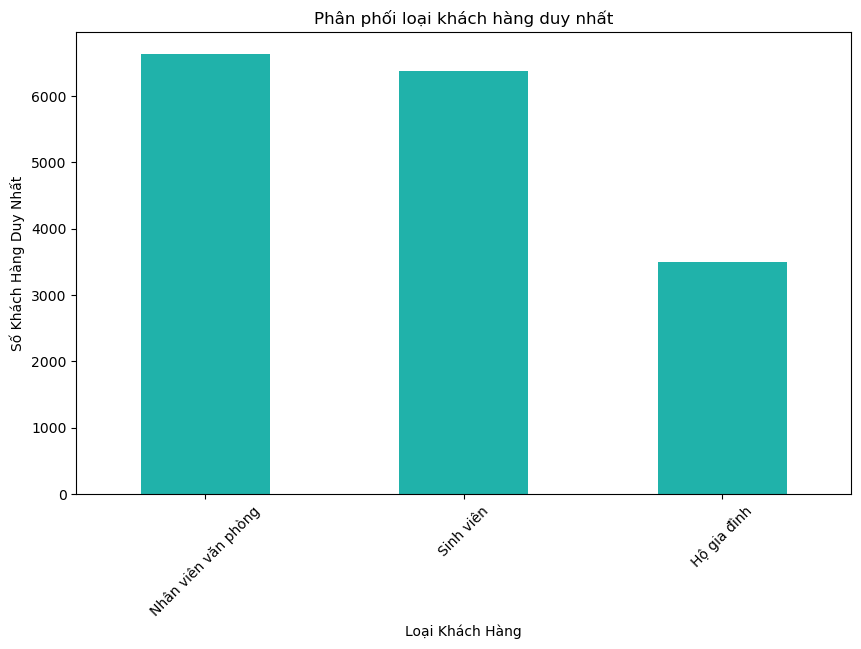

In [ ]:
# Plotting the distribution of unique customer types
plt.figure(figsize=(10, 6))
unique_customer_counts.plot(kind='bar', color='lightseagreen')

plt.title('Phân phối loại khách hàng duy nhất')
plt.xlabel('Loại Khách Hàng')
plt.ylabel('Số Khách Hàng Duy Nhất')
plt.xticks(rotation=45)

plt.show()

### Kiểm tra xem với hộ gia đình thì là khác hàng nào mua nhiều nhất , mua với số tiền bao nhiêu , mua mặt hàng nào , có mã khách hàng là bao nhiêu , thuộc nhóm khách hàng nào

In [ ]:
# Filtering data for 'Hộ gia đình' customers
family_customers = df[df['Thông tin Nhóm KH'] == 'Hộ gia đình']

# Grouping by 'Mã KH' to find the total purchase amount for each family customer
family_customer_purchases = family_customers.groupby('Mã KH').agg({'Tạm tính': 'sum'}).reset_index()

# Finding the family customer who spent the most
top_family_customer = family_customer_purchases.loc[family_customer_purchases['Tạm tính'].idxmax()]

# Getting details of the top spending family customer's purchases
top_family_customer_details = family_customers[family_customers['Mã KH'] == top_family_customer['Mã KH']]

# Summarizing the information for the top spending family customer
top_family_customer_summary = top_family_customer_details.groupby(['Mã KH', 'Thông tin Nhóm KH', 'Mã hàng'])['Tạm tính'].sum().reset_index()

# Finding the top purchased product by this customer
top_purchased_product = top_family_customer_summary.loc[top_family_customer_summary['Tạm tính'].idxmax()]

top_family_customer_summary


,Mã KH,Thông tin Nhóm KH,Mã hàng,Tạm tính
0,CUS0000122,Hộ gia đình,BSA04,1850000
1,CUS0000122,Hộ gia đình,CPT06,400000
2,CUS0000122,Hộ gia đình,CPT07,1000000
3,CUS0000122,Hộ gia đình,CTT04,180000
4,CUS0000122,Hộ gia đình,CTV01,1000000
5,CUS0000122,Hộ gia đình,SDA02,40000


In [ ]:
top_purchased_product

Mã KH                 CUS0000122
Thông tin Nhóm KH    Hộ gia đình
Mã hàng                    BSA04
Tạm tính                 1850000
Name: 0, dtype: object

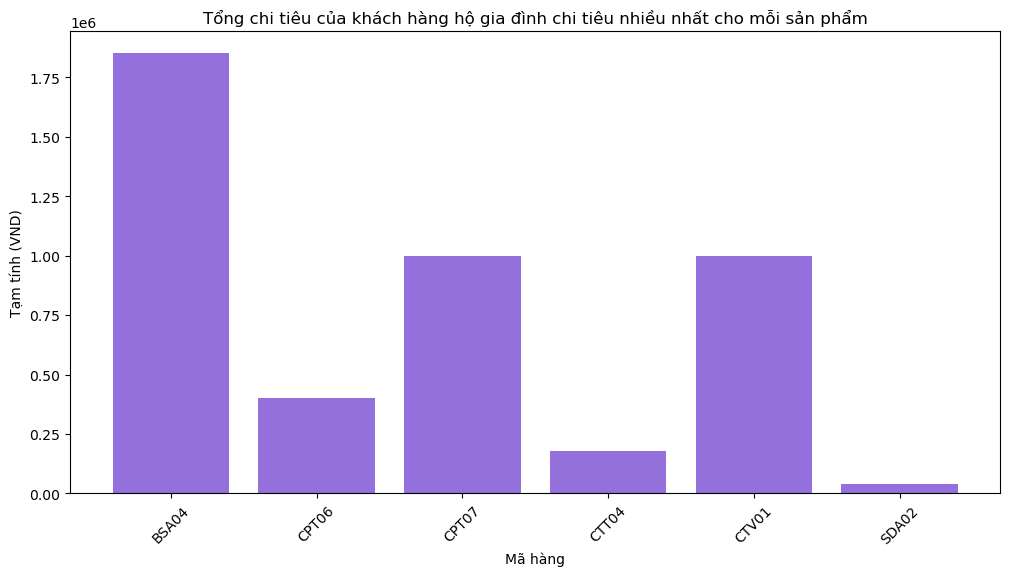

In [ ]:
# Plotting the summary of top spending family customer's purchases

plt.figure(figsize=(12, 6))
plt.bar(top_family_customer_summary['Mã hàng'], top_family_customer_summary['Tạm tính'], color='mediumpurple')

plt.title('Tổng chi tiêu của khách hàng hộ gia đình chi tiêu nhiều nhất cho mỗi sản phẩm')
plt.xlabel('Mã hàng')
plt.ylabel('Tạm tính (VND)')
plt.xticks(rotation=45)

plt.show()


##  Biểu đồ histogram thể hiện tần suất xem khách hàng nào mua nhiều nhất

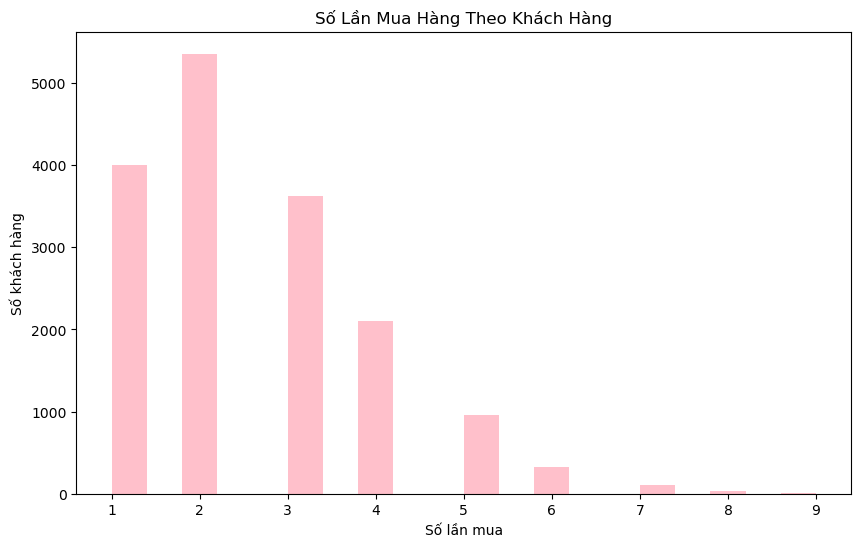

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(top_customer['Số Lần Mua'], bins=20, color='pink')

plt.title('Số Lần Mua Hàng Theo Khách Hàng')
plt.xlabel('Số lần mua')
plt.ylabel('Số khách hàng')
plt.show()

## So sánh khách hàng theo từng nhóm KH

In [ ]:
# Đếm số lượng khách hàng theo từng nhóm
group_customer = df.groupby('Nhóm KH').count()['Mã KH']
group_customer

Nhóm KH
MS1    12604
MS2    17576
MS3    11602
Name: Mã KH, dtype: int64

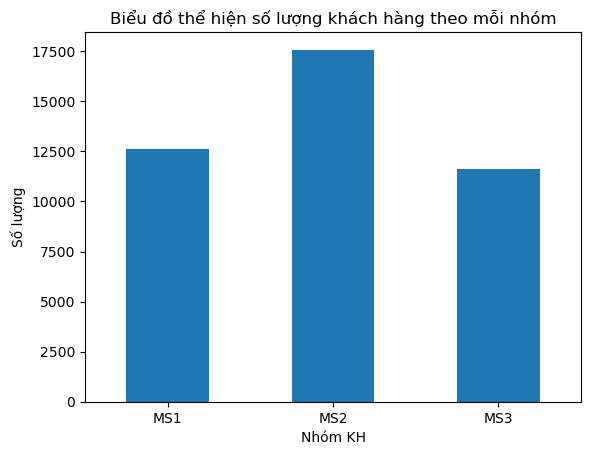

In [ ]:
# Vẽ biểu đồ cột
group_customer.plot(kind='bar')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title("Khách hàng theo nhóm")
plt.xlabel("Nhóm KH",rotation=0)
plt.xticks(rotation=0)
plt.ylabel("Số lượng")
plt.title("Biểu đồ thể hiện số lượng khách hàng theo mỗi nhóm")

plt.show()



## Xem thử Mã nhóm hàng nào có nhiều mã hàng nhất

In [ ]:
# Giả sử df là dataframe chứa các cột 'Nhom_hang', 'Ma_nhom_hang'

# Count the number of unique 'Mã hàng' (product codes) for each 'Mã Nhóm hàng' (group code)
group_product_count = df.groupby('Mã Nhóm hàng')['Mã hàng'].nunique()

group_product_count


Mã Nhóm hàng
BSA     7
CHA     5
CPT     9
CTT     7
CTV     5
DCU     8
DTC     5
HGI     6
SDA    11
TRR     9
XRO     8
Name: Mã hàng, dtype: int64

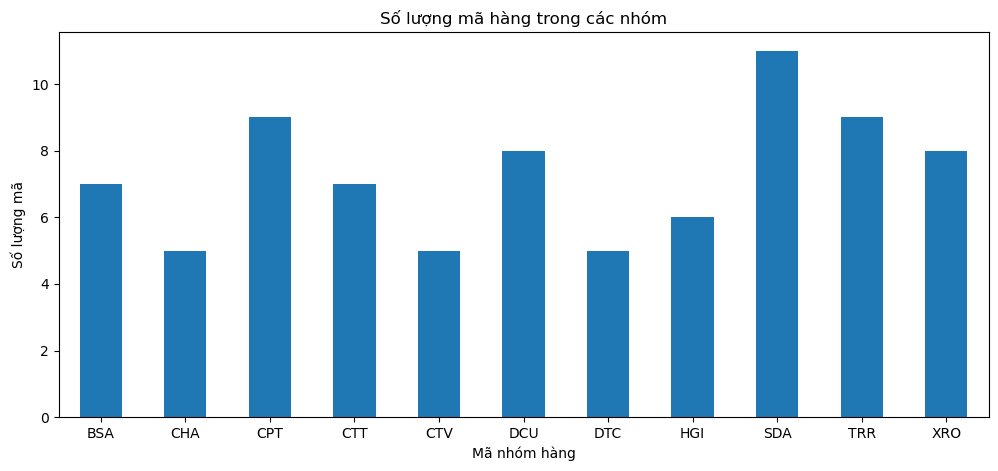

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
ax = plt.gca()

group_product_count .plot(kind='bar', x='Mã Nhóm hàng', y='Số Lượng Mã Hàng', ax=ax)

ax.set_title("Số lượng mã hàng trong các nhóm")
ax.set_xlabel("Mã nhóm hàng")
ax.set_ylabel("Số lượng mã")

plt.xticks(rotation=0)

plt.show()

## Số lượng của từng nhóm khách hàng theo cửa hàng

In [ ]:
# Nhóm theo NhomKH và MaCH rồi đếm
group_customer_group_by_store = df.groupby(["Mã Cửa hàng",'Nhóm KH']).count()['Mã KH']
group_customer_group_by_store

Mã Cửa hàng  Nhóm KH
S1           MS1         6364
             MS2        11211
             MS3         3407
S2           MS1         5125
             MS2         3603
             MS3         4602
S3           MS1         1115
             MS2         2762
             MS3         3593
Name: Mã KH, dtype: int64

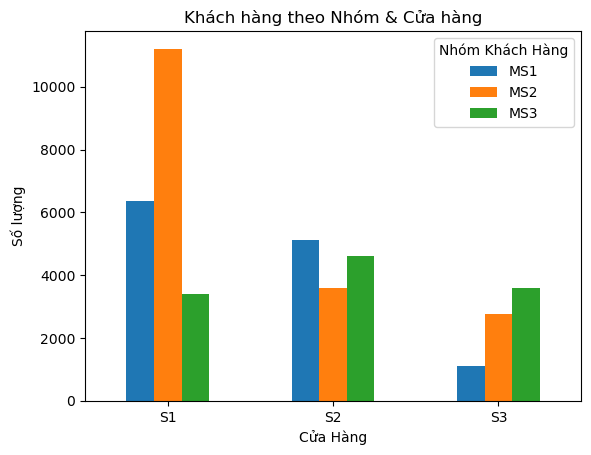

In [ ]:
# Vẽ multiple bar plot
group_customer_group_by_store.unstack().plot(kind="bar")
plt.title("Khách hàng theo Nhóm & Cửa hàng")
plt.xlabel("Cửa Hàng")
plt.xticks(rotation=0)
plt.ylabel("Số lượng")
plt.legend(title='Nhóm Khách Hàng', loc='upper right')

plt.show()

## Tương quan nhóm KH với nhóm mặt hàng

In [ ]:
df_gr1 = df.groupby(['Nhóm KH', 'Mã Nhóm hàng'])['Mã hàng'].count()
df_gr1

Nhóm KH  Mã Nhóm hàng
MS1      BSA              975
         CHA             1961
         CPT             4542
         CTT              476
         CTV             1264
         DCU              225
         DTC              902
         HGI              149
         SDA              704
         TRR             1287
         XRO              119
MS2      BSA              229
         CHA             3281
         CPT              186
         CTT               94
         CTV               40
         DCU               27
         DTC              229
         HGI               42
         SDA             9936
         TRR              157
         XRO             3355
MS3      BSA               28
         CHA             2061
         CPT               23
         CTT              163
         CTV               31
         DCU               18
         DTC              244
         HGI               85
         SDA             5900
         TRR               14
         XRO      

<Figure size 1200x800 with 0 Axes>

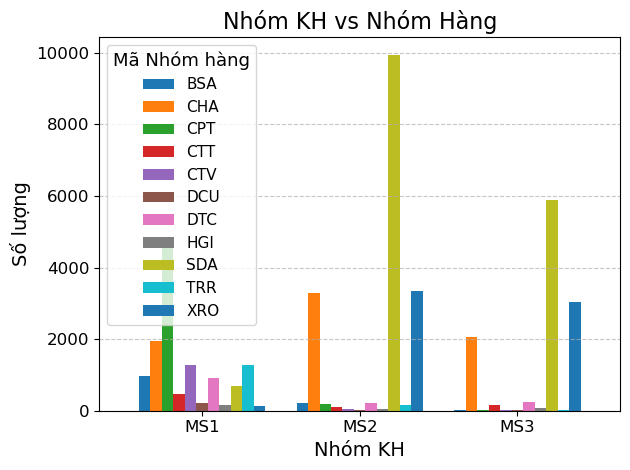

In [ ]:
# Trực quan hóa
plt.figure(figsize=(12, 8))  # Tăng kích thước đồ thị
df_gr1.unstack().plot(kind='bar', width=0.8)  # Điều chỉnh độ rộng cột
plt.title("Nhóm KH vs Nhóm Hàng", fontsize=16)  # Tăng kích thước tiêu đề
plt.xticks(rotation=0, fontsize=12)  # Điều chỉnh kích thước font của trục x
plt.yticks(fontsize=12)  # Điều chỉnh kích thước font của trục y
plt.ylabel("Số lượng", fontsize=14)  # Tăng kích thước font của nhãn trục y
plt.xlabel("Nhóm KH", fontsize=14)  # Thêm nhãn trục x và tăng kích thước font
plt.legend(title='Mã Nhóm hàng', title_fontsize='13', fontsize='11')  # Tăng kích thước chú thích và tiêu đề chú thích
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm gridlines cho trục y
plt.tight_layout()  # Tự động điều chỉnh để đồ thị không bị cắt
plt.show()

## Sự chênh lệch của doanh thu theo từng tháng

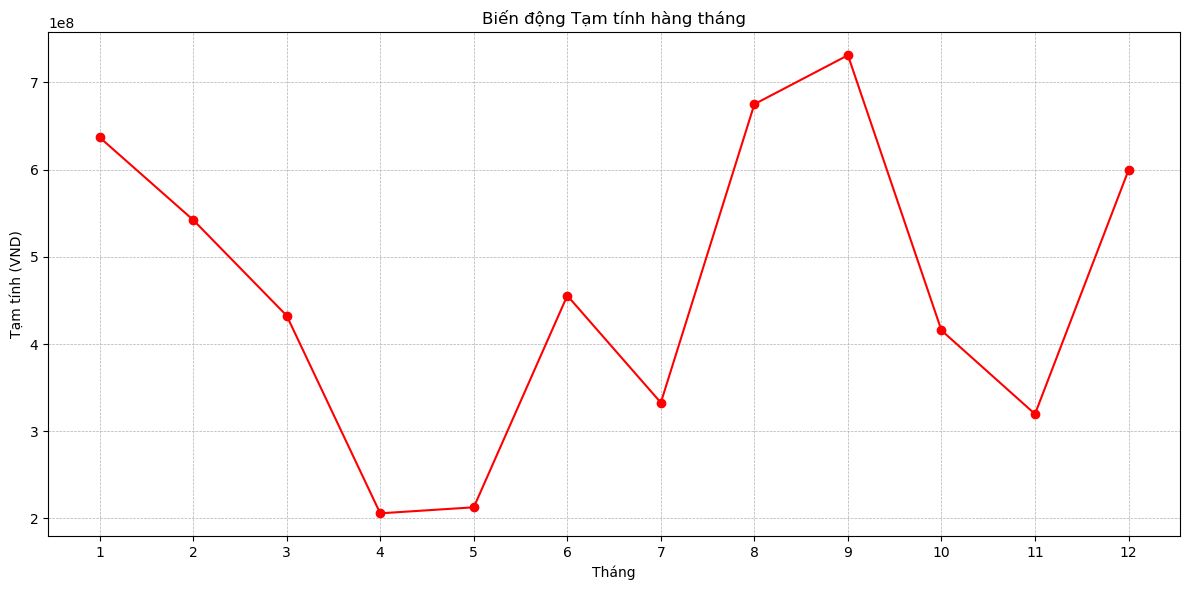

In [ ]:
# Grouping the original data by 'Tháng' and summing 'Tạm tính' to get the total for each month
monthly_subtotals = df.groupby('Tháng')['Tạm tính'].sum().reset_index()

# Plotting the line chart for 'Tạm tính' monthly totals
plt.figure(figsize=(12, 6))

plt.plot(monthly_subtotals['Tháng'], monthly_subtotals['Tạm tính'], marker='o', linestyle='-', color='red')

plt.title('Biến động Tạm tính hàng tháng')
plt.xlabel('Tháng')
plt.ylabel('Tạm tính (VND)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(monthly_subtotals['Tháng'])

plt.tight_layout()
plt.show()


## Xem thử tháng nào doanh số chiếm nhiều nhất

In [ ]:
# Group the data by 'Tháng' and sum 'Tạm tính' to get total sales for each month
monthly_sales = df.groupby('Tháng')['Tạm tính'].sum()
monthly_sales

Tháng
1     637071000
2     542381000
3     432579000
4     205887000
5     212789000
6     455539000
7     332807000
8     675123000
9     731220000
10    415637000
11    319759000
12    599532000
Name: Tạm tính, dtype: int64

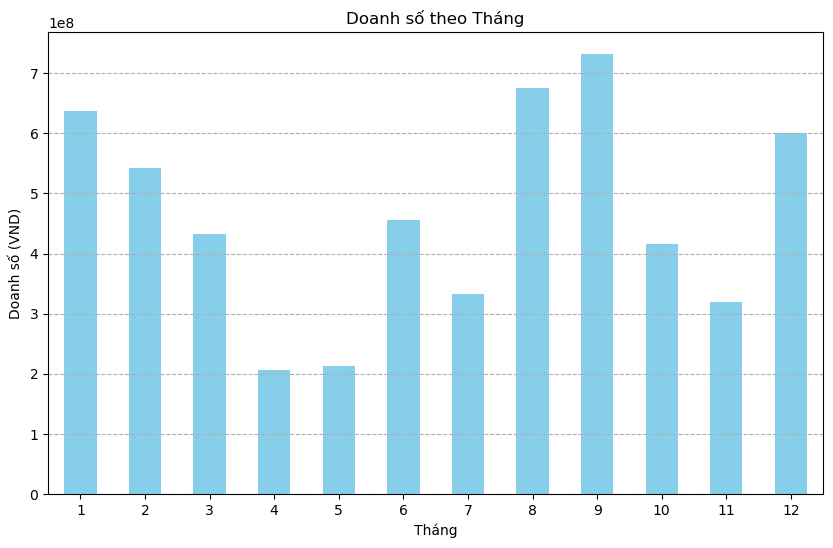

In [ ]:
# Plotting the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Doanh số theo Tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh số (VND)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()

## Xem thử với mỗi tháng thì Nhóm KH nào mua nhiều nhất và với mặt hàng nào

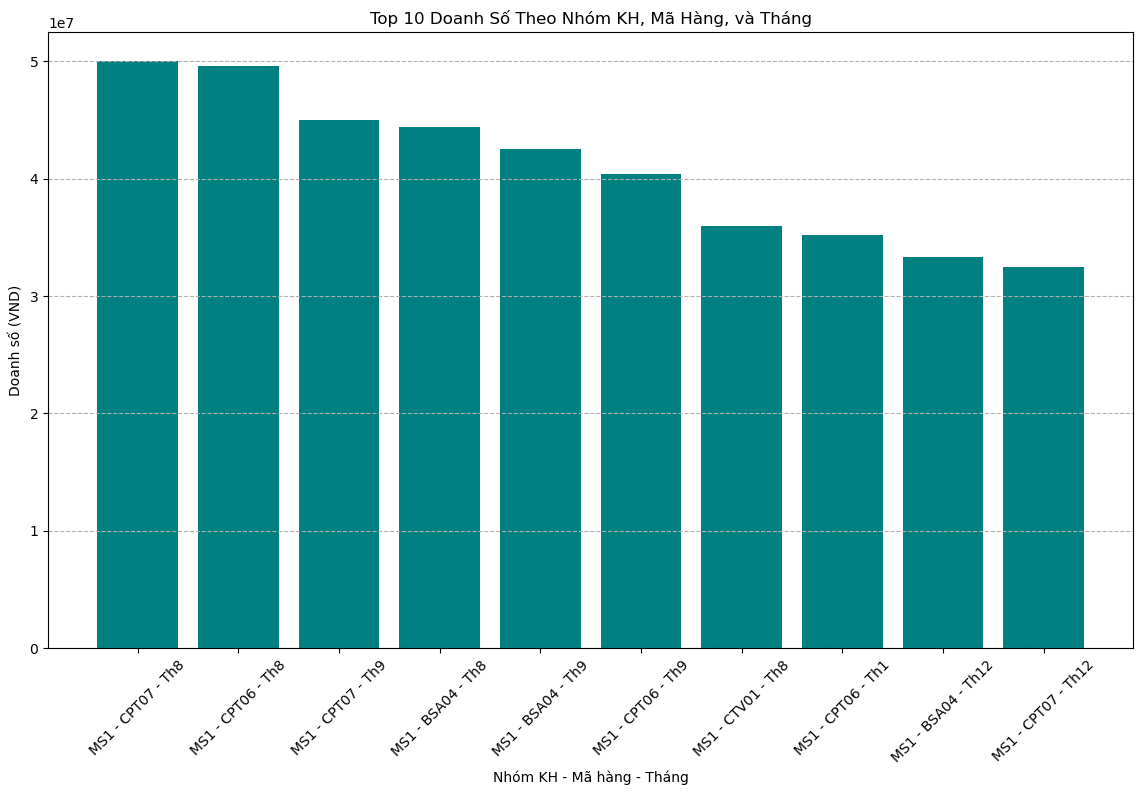

In [ ]:

# Adding 'SL Bán' to the aggregation to also see the quantity sold along with the sales amount
grouped_sales_details = df.groupby(['Nhóm KH', 'Mã hàng', 'Tháng']).agg({'SL Bán': 'sum', 'Tạm tính': 'sum'}).reset_index()

# Sorting the data based on 'Tạm tính' to find the top sales entries
top_sales_details = grouped_sales_details.sort_values('Tạm tính', ascending=False).head(10)

# Plotting the corrected top sales entries focusing on 'Tạm tính' for visualization
plt.figure(figsize=(14, 8))
bar_positions = range(len(top_sales_details))
bar_heights = top_sales_details['Tạm tính']
bar_labels = top_sales_details.apply(lambda x: f"{x['Nhóm KH']} - {x['Mã hàng']} - Th{x['Tháng']}", axis=1)

plt.bar(bar_positions, bar_heights, color='teal')
plt.xticks(bar_positions, bar_labels, rotation=45)
plt.title('Top 10 Doanh Số Theo Nhóm KH, Mã Hàng, và Tháng')
plt.xlabel('Nhóm KH - Mã hàng - Tháng')
plt.ylabel('Doanh số (VND)')
plt.grid(axis='y', linestyle='--')

plt.show()



## Kiểm tra mỗi tháng mặt hàng nào được mua nhiều nhất ( Khách hàng nào mua nhiều nhất, nhóm khách hàng nào mua nhiều nhất)

In [ ]:
# To find the highest selling quantity per month and which product it corresponds to,
# we'll group by 'Tháng' and 'Mã hàng', then sum 'SL Bán' and find the max for each month.

# Grouping data by 'Tháng' and 'Mã hàng' and summing 'SL Bán'
monthly_product_sales = df.groupby(['Tháng', 'Mã hàng']).agg({'SL Bán': 'sum'}).reset_index()

# monthly_product_sales

# Finding the highest selling product for each month
highest_monthly_sales = monthly_product_sales.loc[monthly_product_sales.groupby('Tháng')['SL Bán'].idxmax()]

highest_monthly_sales


,Tháng,Mã hàng,SL Bán
52,1,SDA02,313
131,2,SDA02,263
209,3,SDA02,156
287,4,SDA02,99
362,5,SDA02,95
439,6,SDA02,252
518,7,SDA02,174
557,8,CPT01,193
678,9,SDA02,235
754,10,SDA02,211


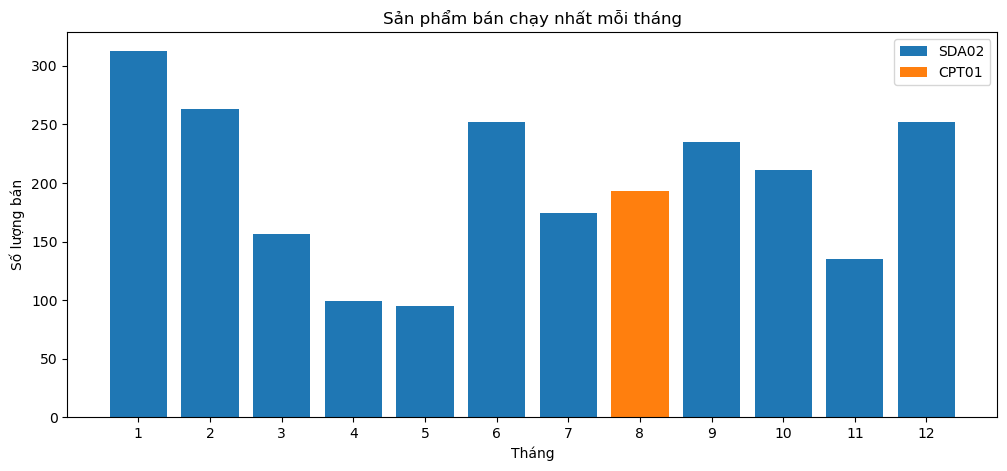

In [ ]:
# Get a list of unique product codes from the highest_monthly_sales DataFrame
unique_products = highest_monthly_sales['Mã hàng'].unique()

# Create a color map for each product code
color_map = {product: f'C{i}' for i, product in enumerate(unique_products)}

# Plot with colors based on product code
plt.figure(figsize=(12, 5))
for index, row in highest_monthly_sales.iterrows():
    plt.bar(row['Tháng'], row['SL Bán'], color=color_map[row['Mã hàng']], label=row['Mã hàng'])

# To avoid duplicate labels in the legend, we handle them separately
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("Sản phẩm bán chạy nhất mỗi tháng")
plt.xlabel("Tháng")
plt.ylabel("Số lượng bán")
plt.xticks(highest_monthly_sales['Tháng'])

plt.show()

### add thêm Nhóm KH

In [ ]:
top_customers_per_month_product_quantity = []

for index, row in highest_monthly_sales.iterrows():
    month = row['Tháng']
    product_code = row['Mã hàng']
    # Filter the original dataset for entries matching the month and product_code
    filtered_data = df[(df['Tháng'] == month) & (df['Mã hàng'] == product_code)]
    # Find the customer who bought the most of this product in this month
    top_customer_series = filtered_data.groupby('Nhóm KH')['SL Bán'].sum()
    top_customer = top_customer_series.idxmax()
    quantity_purchased = top_customer_series.max()
    # Append the result to the list
    top_customers_per_month_product_quantity.append({'Tháng': month, 'Mã hàng': product_code, 'Nhóm KH': top_customer, 'SL Bán': quantity_purchased})

# Convert the list to a DataFrame for easier reading
top_customers_group_df_quantity = pd.DataFrame(top_customers_per_month_product_quantity)

top_customers_group_df_quantity

,Tháng,Mã hàng,Nhóm KH,SL Bán
0,1,SDA02,MS3,167
1,2,SDA02,MS3,150
2,3,SDA02,MS2,84
3,4,SDA02,MS3,57
4,5,SDA02,MS2,50
5,6,SDA02,MS2,153
6,7,SDA02,MS3,91
7,8,CPT01,MS1,193
8,9,SDA02,MS3,119
9,10,SDA02,MS2,137


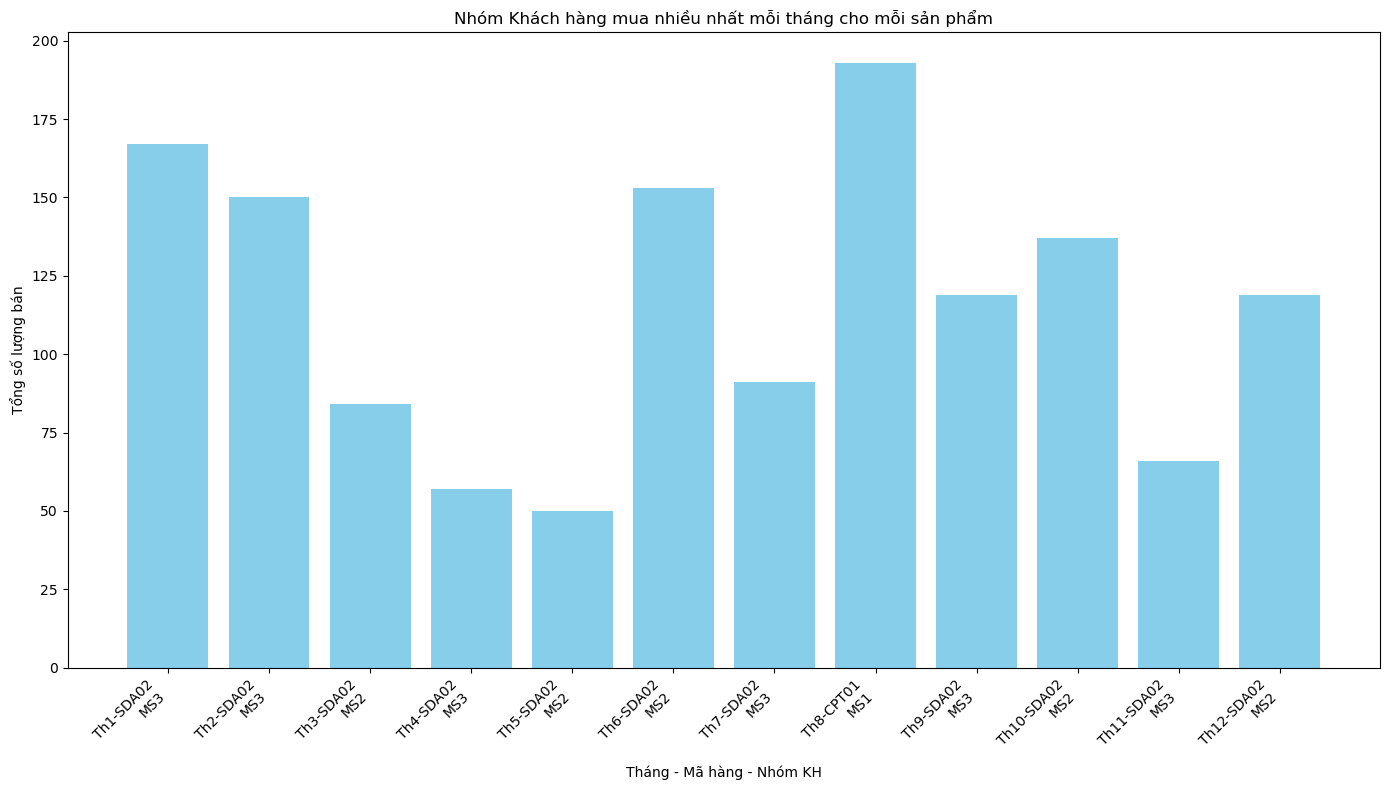

In [ ]:
# Adjusting the visualization to include the 'Nhóm KH' in the plot
plt.figure(figsize=(14, 8))

# Creating a unique label for each combination of month, product, and customer group
labels = top_customers_group_df_quantity.apply(lambda row: f"Th{row['Tháng']}-{row['Mã hàng']}\n{row['Nhóm KH']}", axis=1)
values = top_customers_group_df_quantity['SL Bán']

plt.bar(labels, values, color='skyblue')

plt.title("Nhóm Khách hàng mua nhiều nhất mỗi tháng cho mỗi sản phẩm")
plt.xlabel("Tháng - Mã hàng - Nhóm KH")
plt.ylabel("Tổng số lượng bán")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### add thêm Mã Khách Hàng

In [ ]:
# Adjusting the previous approach to also include the quantity purchased by the top customer for each product in each month
top_customers_per_month_product_quantity = []

for index, row in highest_monthly_sales.iterrows():
    month = row['Tháng']
    product_code = row['Mã hàng']
    # Filter the original dataset for entries matching the month and product_code
    filtered_data = df[(df['Tháng'] == month) & (df['Mã hàng'] == product_code)]
    # Find the customer who bought the most of this product in this month
    top_customer_series = filtered_data.groupby('Mã KH')['SL Bán'].sum()
    top_customer = top_customer_series.idxmax()
    quantity_purchased = top_customer_series.max()
    # Append the result to the list
    top_customers_per_month_product_quantity.append({'Tháng': month, 'Mã hàng': product_code, 'Mã KH': top_customer, 'SL Bán': quantity_purchased})

# Convert the list to a DataFrame for easier reading
top_customers_df_quantity = pd.DataFrame(top_customers_per_month_product_quantity)

top_customers_df_quantity



,Tháng,Mã hàng,Mã KH,SL Bán
0,1,SDA02,CUS0000063,2
1,2,SDA02,CUS0003726,3
2,3,SDA02,CUS0003921,2
3,4,SDA02,CUS0005013,2
4,5,SDA02,CUS0005856,2
5,6,SDA02,CUS0006436,2
6,7,SDA02,CUS0008249,2
7,8,CPT01,CUS0009252,2
8,9,SDA02,CUS0010890,2
9,10,SDA02,CUS0013664,3


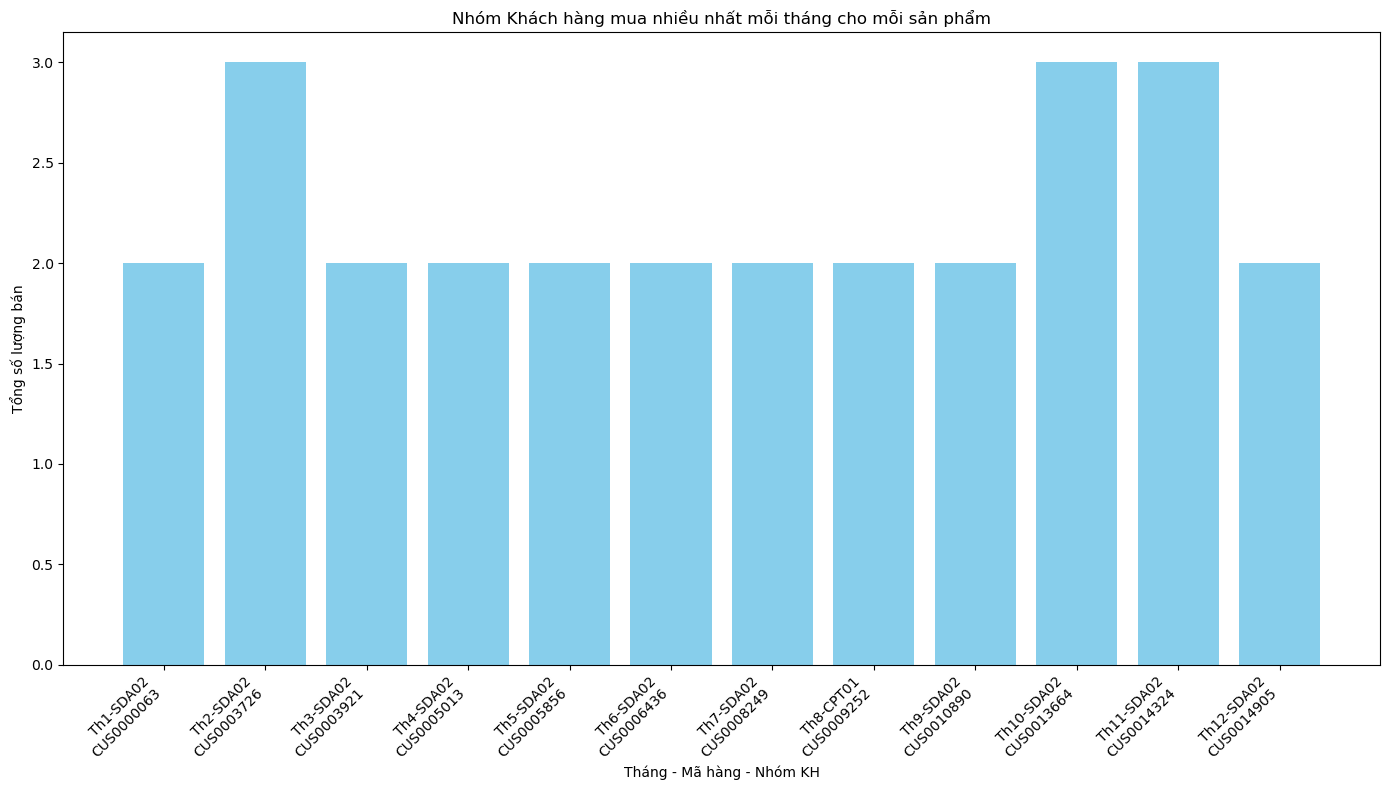

In [ ]:
plt.figure(figsize=(14, 8))

# Creating a unique label for each combination of month, product, and customer group
labels = top_customers_df_quantity.apply(lambda row: f"Th{row['Tháng']}-{row['Mã hàng']}\n{row['Mã KH']}", axis=1)
values = top_customers_df_quantity['SL Bán']

plt.bar(labels, values, color='skyblue')

plt.title("Nhóm Khách hàng mua nhiều nhất mỗi tháng cho mỗi sản phẩm")
plt.xlabel("Tháng - Mã hàng - Nhóm KH")
plt.ylabel("Tổng số lượng bán")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Kiểm tra xem mỗi tháng thì Nhóm KH nào mua nhiều nhất

In [ ]:
customer_monthly_spending = df.groupby(['Tháng', 'Nhóm KH'])['Tạm tính'].sum().reset_index()

# Finding the customer who spent the most each month
top_group_customer_spend = customer_monthly_spending.loc[customer_monthly_spending.groupby('Tháng')['Tạm tính'].idxmax()]

# Sorting the results for clarity
top_group_customer_spend_sorted = top_group_customer_spend.sort_values(by=['Tháng', 'Tạm tính'])

top_group_customer_spend_sorted

,Tháng,Nhóm KH,Tạm tính
0,1,MS1,352493000
3,2,MS1,296294000
6,3,MS1,290282000
9,4,MS1,113549000
12,5,MS1,118482000
15,6,MS1,216937000
18,7,MS1,175078000
21,8,MS1,544279000
24,9,MS1,548634000
27,10,MS1,210154000


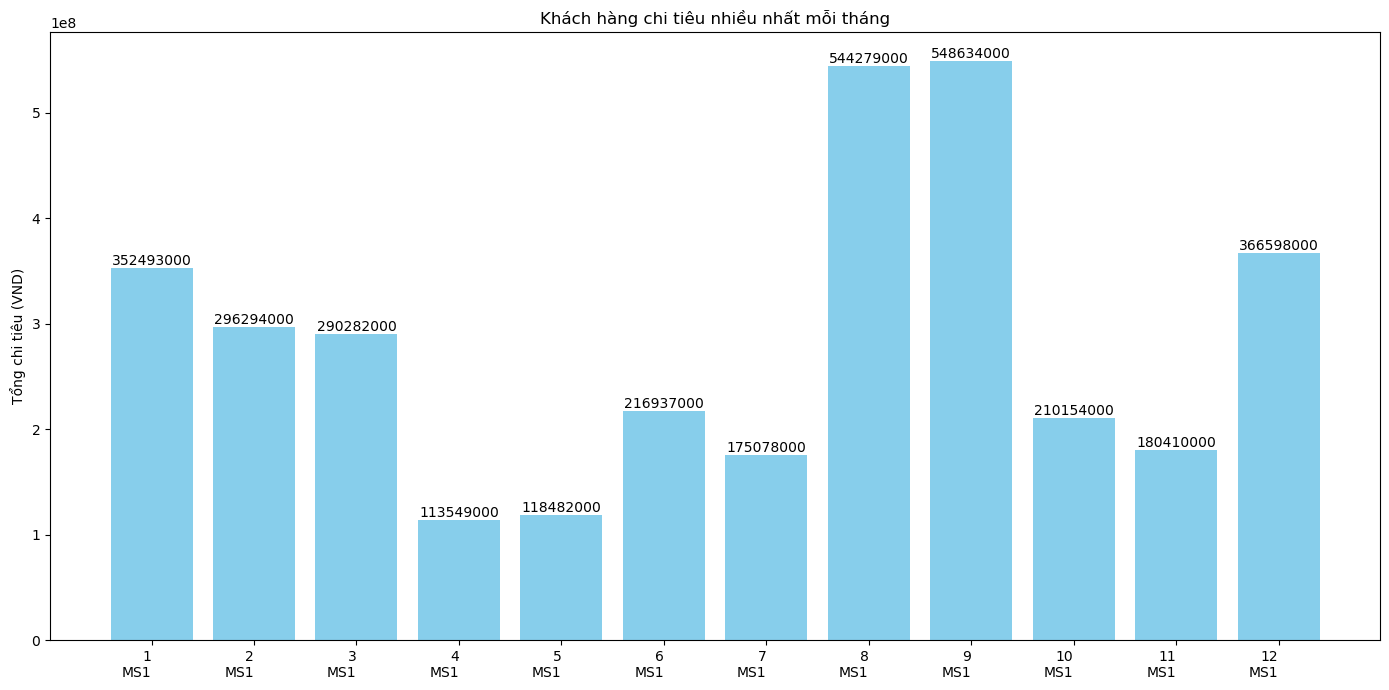

In [ ]:
plt.figure(figsize=(14, 7))

# Create bar plot
bars = plt.bar(top_group_customer_spend_sorted['Tháng'].astype(str) + '\n' + top_group_customer_spend_sorted['Nhóm KH'],
               top_group_customer_spend_sorted['Tạm tính'],
               color='skyblue')

plt.ylabel("Tổng chi tiêu (VND)")
plt.title("Khách hàng chi tiêu nhiều nhất mỗi tháng")
plt.xticks(rotation=0, ha="right")

# Adding the text labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Kiểm tra xem mỗi tháng thì những khách hàng nào mua nhiều nhất

In [ ]:
# To find which customer has spent the most money each month for the business,
# we'll sum the 'Tạm tính' (which represents the total amount spent) for each 'Mã KH' per month.

# Grouping data by 'Tháng' and 'Mã KH' and summing 'Tạm tính' to find the total amount spent by each customer per month
customer_monthly_spending = df.groupby(['Tháng', 'Mã KH'])['Tạm tính'].sum().reset_index()

# Finding the customer who spent the most each month
top_spenders_per_month = customer_monthly_spending.loc[customer_monthly_spending.groupby('Tháng')['Tạm tính'].idxmax()]

# Sorting the results for clarity
top_spenders_per_month_sorted = top_spenders_per_month.sort_values(by=['Tháng', 'Tạm tính'])

top_spenders_per_month_sorted


,Tháng,Mã KH,Tạm tính
121,1,CUS0000122,4470000
2905,2,CUS0002906,4000000
4753,3,CUS0004754,3718000
5104,4,CUS0005105,3590000
5714,5,CUS0005715,3500000
6878,6,CUS0006879,3315000
9018,7,CUS0009019,3439000
10109,8,CUS0010110,4100000
12099,9,CUS0012100,3720000
12628,10,CUS0012629,3319000


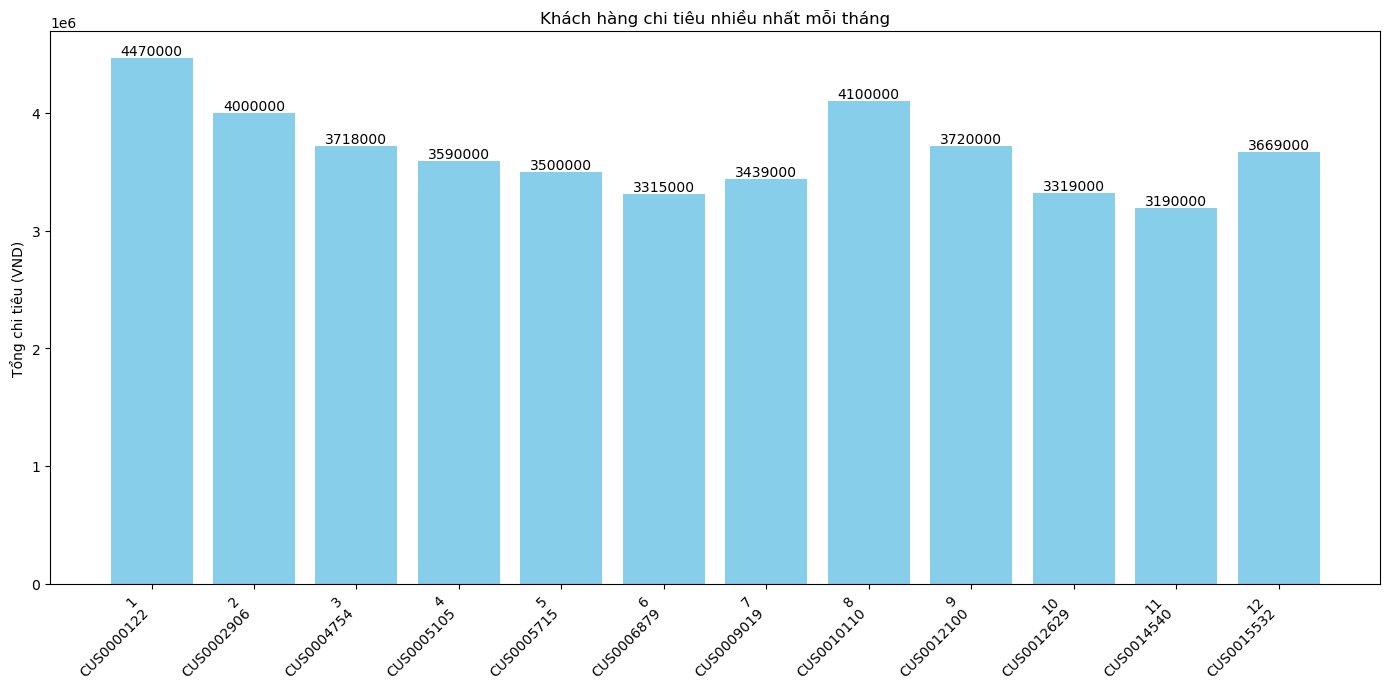

In [ ]:
plt.figure(figsize=(14, 7))

# Create bar plot
bars = plt.bar(top_spenders_per_month_sorted['Tháng'].astype(str) + '\n' + top_spenders_per_month_sorted['Mã KH'],
               top_spenders_per_month_sorted['Tạm tính'],
               color='skyblue')

plt.ylabel("Tổng chi tiêu (VND)")
plt.title("Khách hàng chi tiêu nhiều nhất mỗi tháng")
plt.xticks(rotation=45, ha="right")

# Adding the text labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()
